In [1]:
import plotly.express as px

#### Disclaimer: GitHub does note render plotly correctly, animations will not work as I have exported svg files

### Load Data

In [2]:
iris = px.data.iris()
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


In [3]:
tips = px.data.tips()
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
gapminder = px.data.gapminder()
gapminder_2007 = gapminder[gapminder["year"]==2007]
gapminder_2007.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8


### Scatter Plot

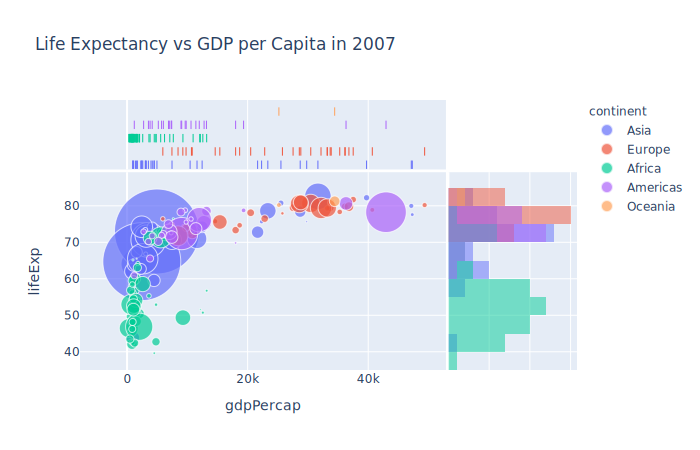

In [10]:
fig = px.scatter(
    gapminder_2007, 
    x="gdpPercap", 
    y="lifeExp",
    color="continent",
    size="pop",
    size_max=60,
    hover_name="country",
    marginal_y="histogram",
    marginal_x="rug",
    title="Life Expectancy vs GDP per Capita in 2007",   
    
)

fig.show("svg")

### Scatter Plot with Error Bars

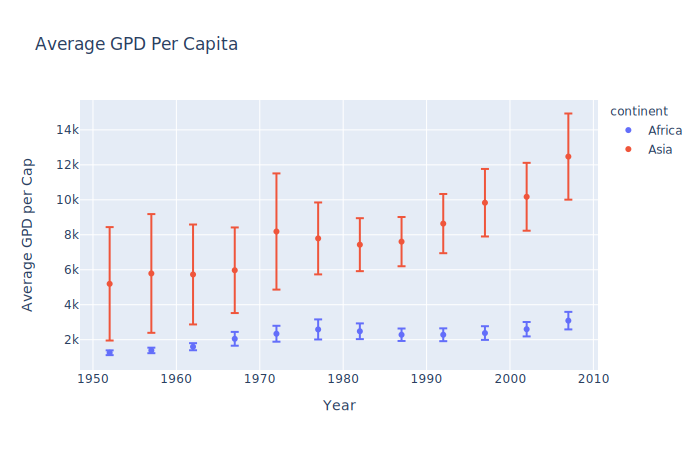

In [9]:
mask_africa_europe = (gapminder["continent"] == "Africa") | (gapminder["continent"] == "Asia")

africa_europe = gapminder.loc[mask_africa_europe, ["year", "continent", "gdpPercap"]]
africa_europe = africa_europe.groupby(["year", "continent"]).agg({"gdpPercap":["mean", "sem"]})
africa_europe.reset_index(inplace=True)
africa_europe.columns = ["year", "continent", "gdpPercap_mean", "gdpPercap_se"]
africa_europe = africa_europe.sort_values(by="year")

fig = px.scatter(
    africa_europe,
    x="year",
    y="gdpPercap_mean",
    color="continent",
    error_y="gdpPercap_se",
    title="Average GPD Per Capita",
)

fig.update_yaxes(title="Average GPD per Cap")
fig.update_xaxes(title="Year")

fig.show("svg")

### Scatter Plot  with Trendline

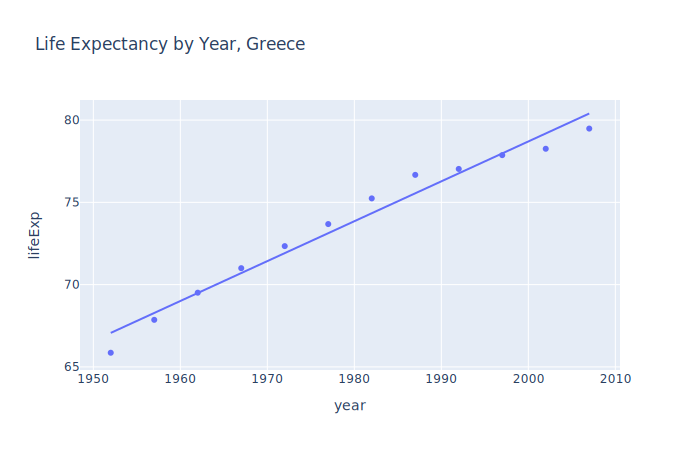

In [11]:
fig = px.scatter(
    gapminder[gapminder["country"]=="Greece"], 
    x="year", 
    y="lifeExp",
    trendline="ols",
    title="Life Expectancy by Year, Greece",    
)

fig.show("svg")

### Scatter Plot Animation

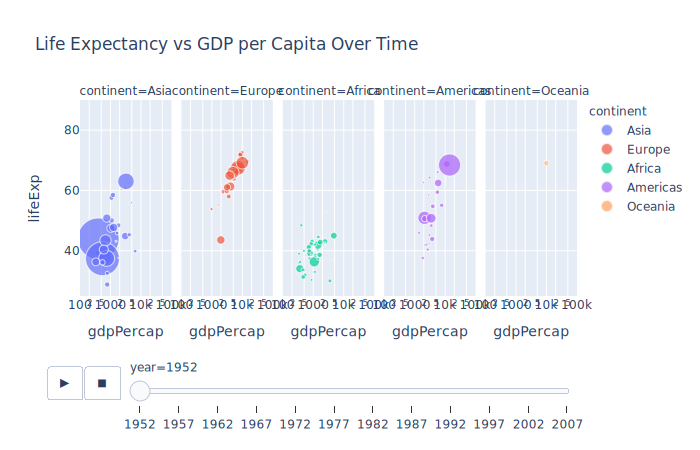

In [12]:
fig = px.scatter(
    gapminder, 
    x="gdpPercap", 
    y="lifeExp",
    color="continent",
    animation_frame="year",
    animation_group="country",
    size="pop",
    size_max=45,
    hover_name="country",
    facet_col="continent",
    log_x=True,
    range_x=[100,100000], 
    range_y=[25,90],
    title="Life Expectancy vs GDP per Capita Over Time"
)

fig.show("svg")

### Scatter Plot Matrix

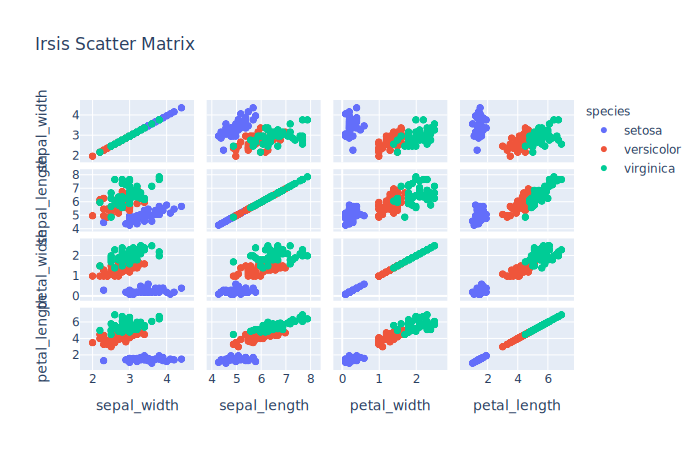

In [13]:
fig = px.scatter_matrix(
    iris,
    color="species",
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    title="Irsis Scatter Matrix"
)

fig.show("svg")

### Line Plot

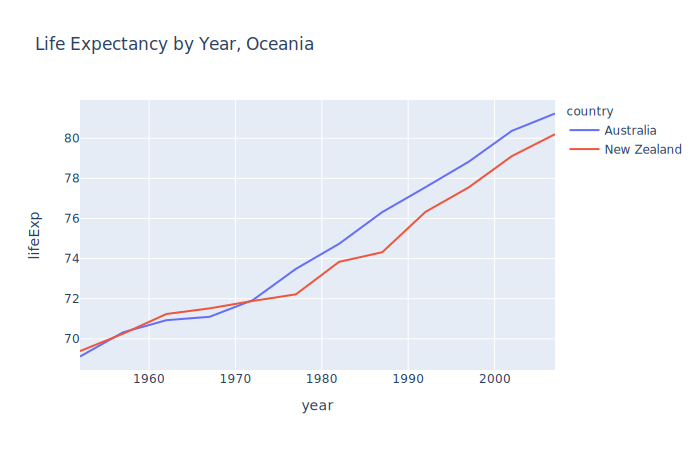

In [14]:
fig = px.line(
    gapminder[gapminder["continent"]=="Oceania"], 
    x="year", 
    y="lifeExp",
    color="country",
    title="Life Expectancy by Year, Oceania",    
)

fig.show("svg")

### Bar Plot

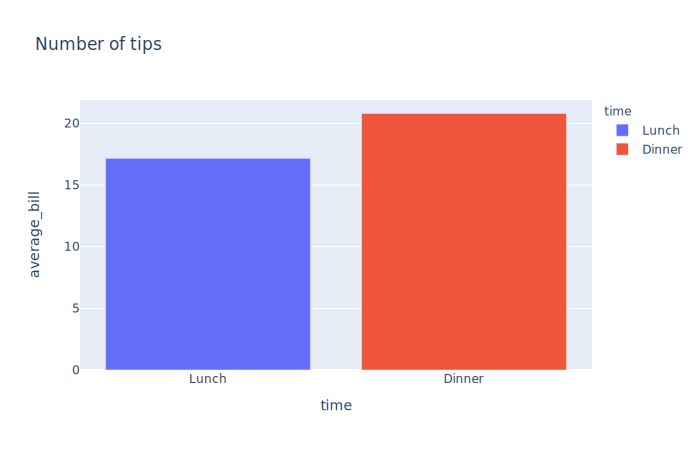

In [16]:
avg_tip_by_time = tips[["time","total_bill"]].groupby("time").agg("mean")
avg_tip_by_time.reset_index(inplace=True)
avg_tip_by_time.columns = ["time", "average_bill"]

fig = px.bar(
    avg_tip_by_time, 
    x="time", 
    y="average_bill",
    color="time",
    title="Number of tips",
    category_orders=dict(time=["Lunch", "Dinner"]),
    
)

fig.show("svg")

### Histogram

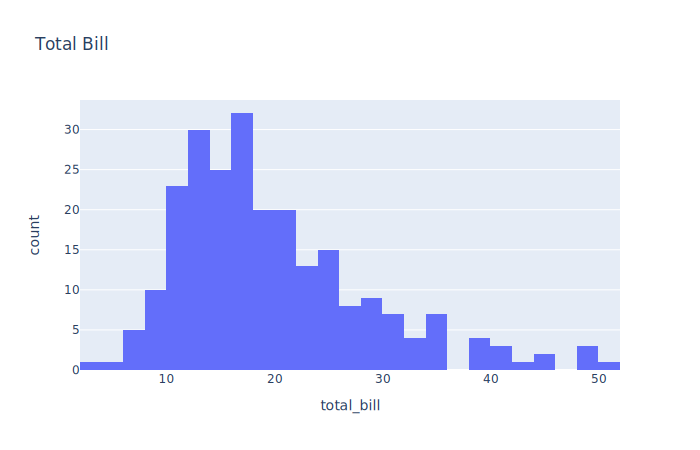

In [17]:
fig = px.histogram(
    tips, 
    x="total_bill", 
    title="Total Bill",       
)

fig.show("svg")

### Histogram with aggregate function

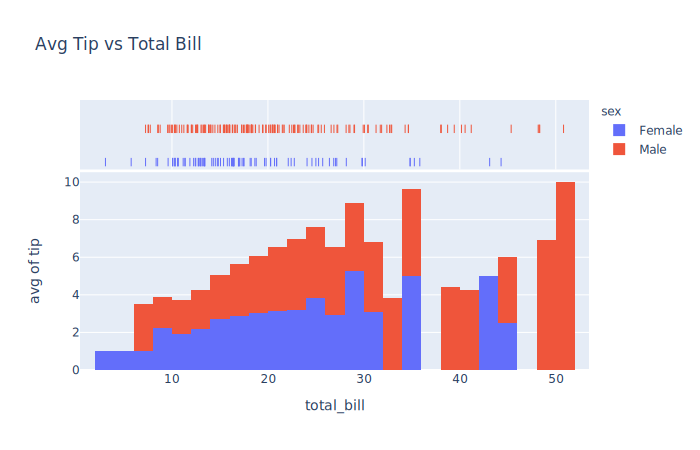

In [18]:
fig =px.histogram(
    tips, 
    x="total_bill", 
    y="tip",
    color="sex",
    histfunc="avg",
    marginal="rug",
    title="Avg Tip vs Total Bill",       
)

fig.show("svg")

### Boxplot

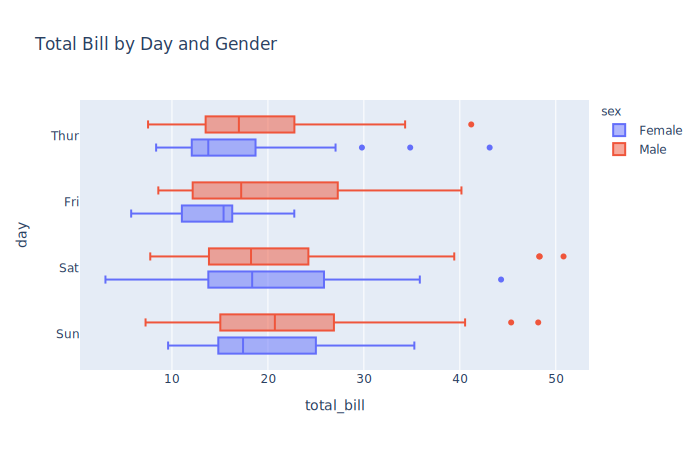

In [19]:
fig = px.box(
    tips, 
    x="total_bill", 
    y="day",
    color="sex",
    orientation="h",
    category_orders=dict(day=["Thur", "Fri", "Sat", "Sun"]),
    title="Total Bill by Day and Gender"
)

fig.show("svg")

### Map

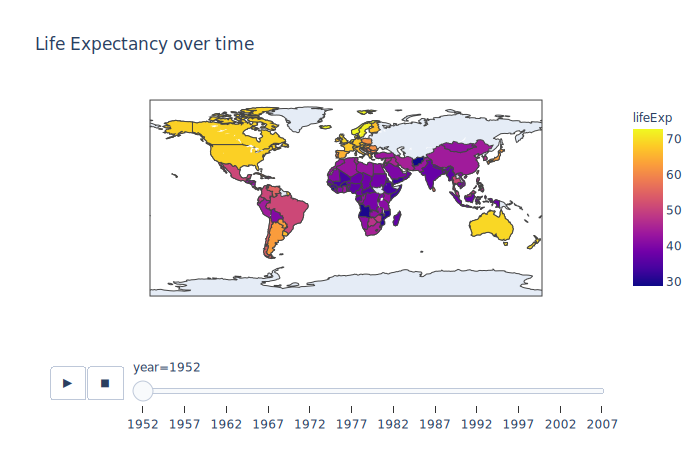

In [20]:
fig = px.choropleth(
    gapminder, 
    locations="iso_alpha", 
    color="lifeExp",
    hover_name="country",
    animation_frame="year",
    animation_group="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Life Expectancy over time"
)

fig.show("svg")